In [20]:
!pip install pandas
!pip install matplotlib

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline


In [22]:
# Load the dataset
file_path = './CO2_emissions_per_capita_per_country.csv' # Update this path if necessary
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()


,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.915833,24.670529,24.505835,13.155542,8.351294,8.408363,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,0.107637,0.123734,...,0.241723,0.293837,0.412017,0.350371,0.315602,0.299445,NaN,NaN,NaN,NaN
2,Angola,AGO,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,0.246413,0.154912,...,1.232495,1.243406,1.252789,1.330843,1.254617,1.291328,NaN,NaN,NaN,NaN
3,Albania,ALB,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,...,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.121652,6.122595,5.867130,5.916597,5.900753,5.832170,NaN,NaN,NaN,NaN


In [23]:
data.tail()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,0.702611,0.506779,0.726302,0.535971,0.655561,0.696540,0.602812,0.521386,...,1.069059,0.992602,0.810900,0.749447,0.996885,0.864835,NaN,NaN,NaN,NaN
261,South Africa,ZAF,5.610092,5.703690,5.747719,5.811157,6.163809,6.431587,6.265413,6.361646,...,9.870597,9.190699,9.004033,8.845033,8.673963,8.980119,NaN,NaN,NaN,NaN
262,Zambia,ZMB,NaN,NaN,NaN,NaN,0.949422,1.099048,0.952613,1.263954,...,0.186396,0.194337,0.205911,0.249457,0.261113,0.288271,NaN,NaN,NaN,NaN
263,Zimbabwe,ZWE,NaN,NaN,NaN,NaN,1.047748,1.182364,1.327983,1.127398,...,0.405716,0.552146,0.664751,0.529703,0.775564,0.779956,NaN,NaN,NaN,NaN


In [24]:
# Clean the data
# Fill missing values with 0, but you can choose a different method if it makes more sense for your data.
data.fillna(0, inplace=True)

# Convert year columns to numeric if they are not already
year_columns = data.columns[2:]  # Assuming the first two columns are 'Country Name' and 'Country Code'
data[year_columns] = data[year_columns].apply(pd.to_numeric)


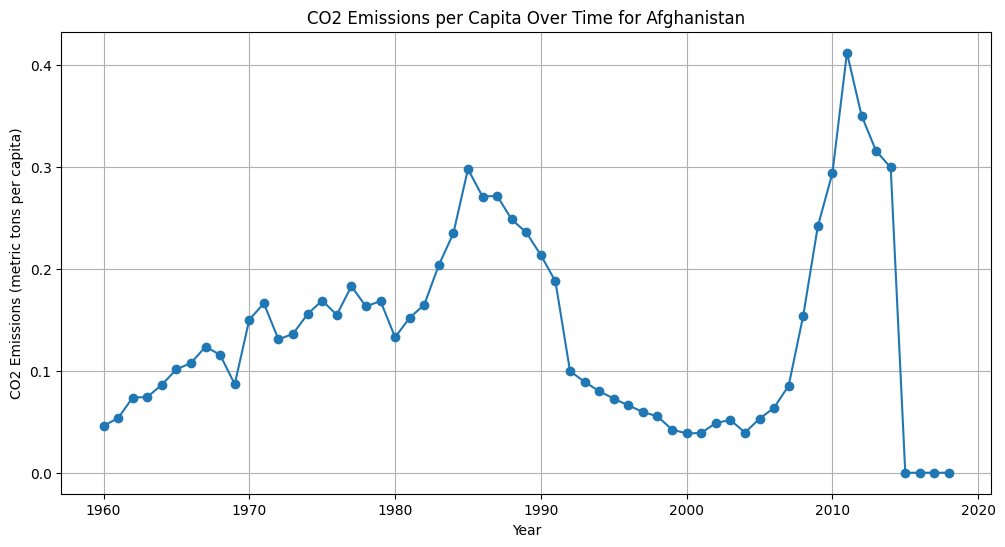

In [25]:
#Plot of CO2 emissions over time for a specific country (lets use Afghanistan)
country = 'Afghanistan'
country_data = data[data['Country Name'] == country].iloc[:, 2:].T
country_data.columns = ['CO2 Emissions']
country_data.index = country_data.index.astype(int)

plt.figure(figsize=(12, 6))
plt.plot(country_data, marker='o')
plt.title(f'CO2 Emissions per Capita Over Time for {country}')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.grid(True)
plt.show()


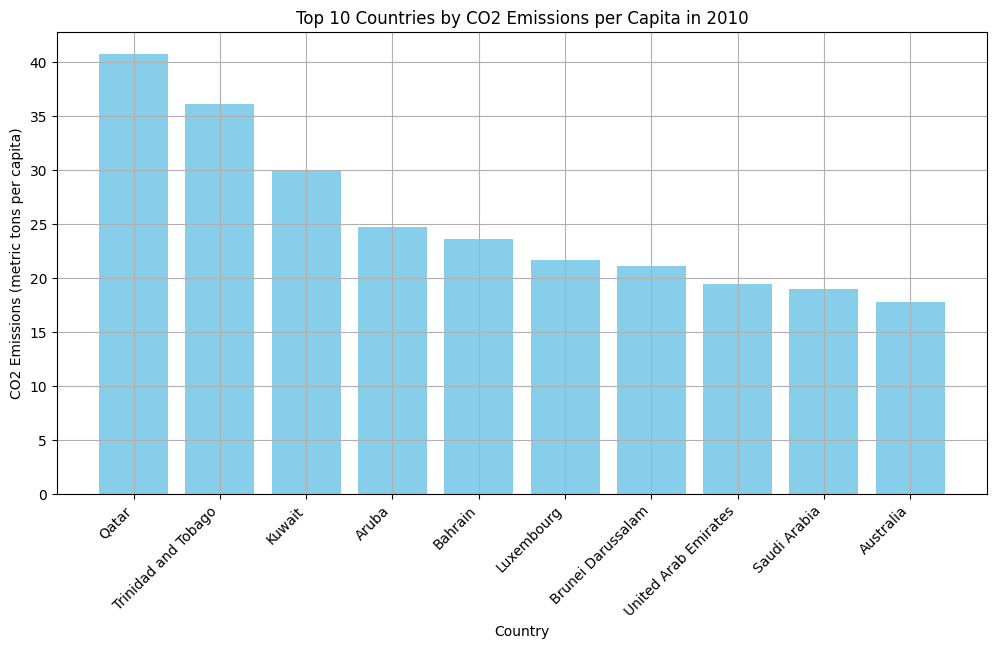

In [26]:
# Compare CO2 emissions between countries for a specific year (lets use 2010)
year = 2010
top_countries = data[['Country Name', str(year)]].sort_values(by=str(year), ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_countries['Country Name'], top_countries[str(year)], color='skyblue')
plt.title(f'Top 10 Countries by CO2 Emissions per Capita in {year}')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


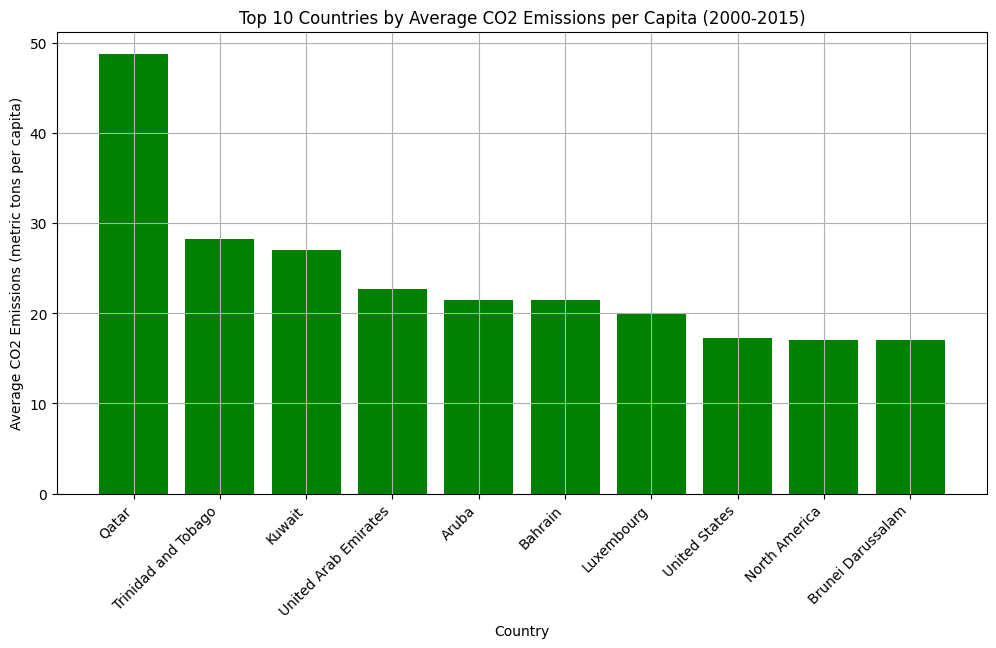

In [27]:
# Analyzing the average CO2 emissions over a period (lets work with: 2000-2015)
start_year = 2000
end_year = 2015
period_columns = [str(year) for year in range(start_year, end_year+1)]

data['Average Emissions (2000-2015)'] = data[period_columns].mean(axis=1)
top_average_countries = data[['Country Name', 'Average Emissions (2000-2015)']].sort_values(by='Average Emissions (2000-2015)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_average_countries['Country Name'], top_average_countries['Average Emissions (2000-2015)'], color='green')
plt.title(f'Top 10 Countries by Average CO2 Emissions per Capita (2000-2015)')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric tons per capita)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


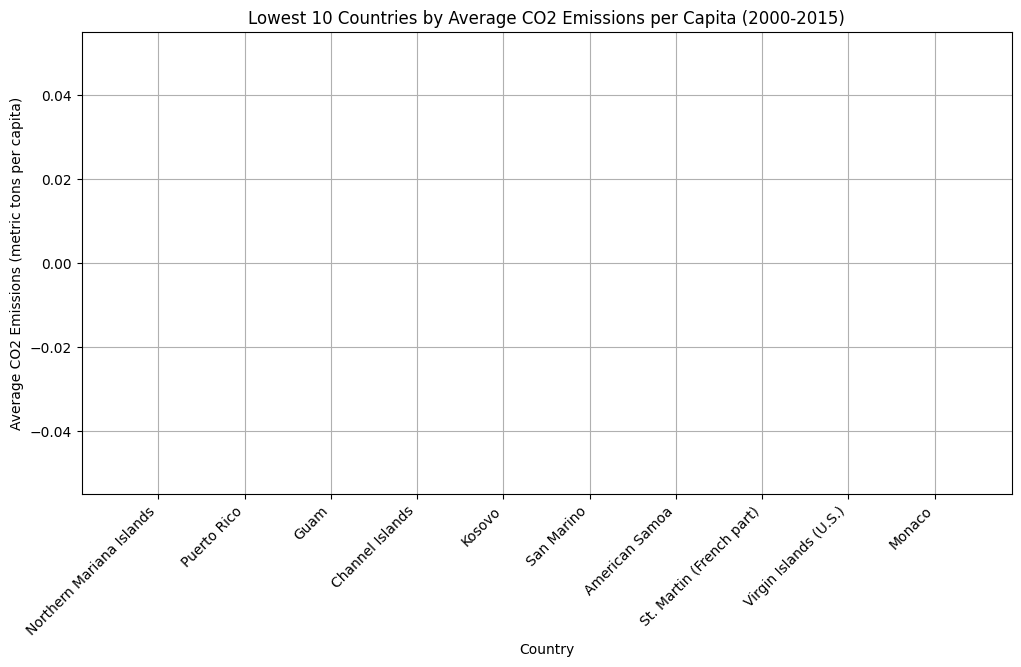

In [28]:
lowest_average_countries = data[['Country Name', 'Average Emissions (2000-2015)']].sort_values(by='Average Emissions (2000-2015)').head(10)

plt.figure(figsize=(12, 6))
plt.bar(lowest_average_countries['Country Name'], lowest_average_countries['Average Emissions (2000-2015)'], color='red')
plt.title('Lowest 10 Countries by Average CO2 Emissions per Capita (2000-2015)')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (metric tons per capita)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


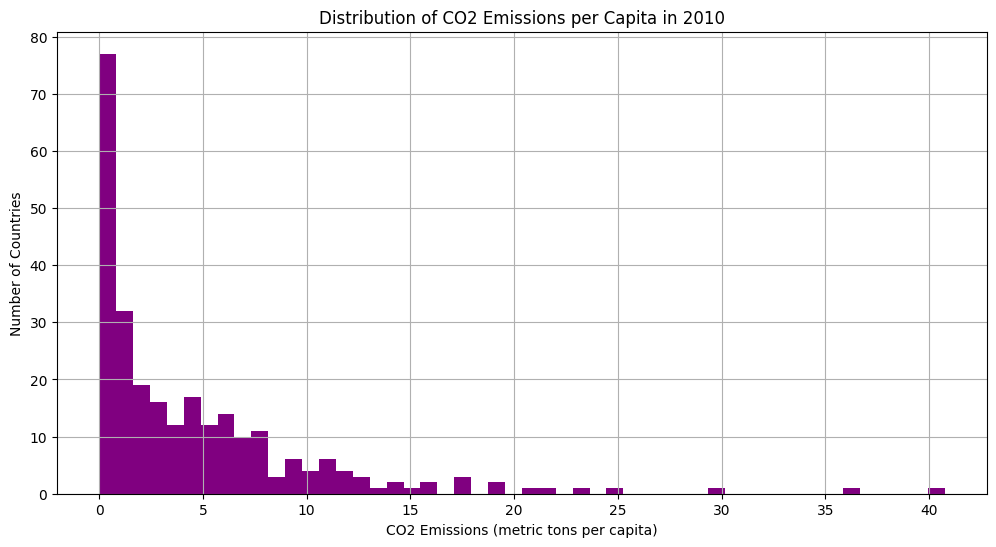

In [29]:
plt.figure(figsize=(12, 6))
plt.hist(data[str(2010)], bins=50, color='purple')
plt.title('Distribution of CO2 Emissions per Capita in 2010')
plt.xlabel('CO2 Emissions (metric tons per capita)')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

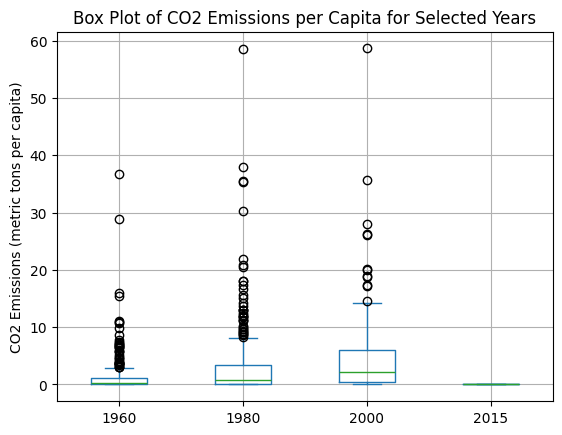

In [30]:
selected_years = ['1960', '1980', '2000', '2015']
data_selected_years = data[selected_years]

plt.figure(figsize=(12, 6))
data_selected_years.plot(kind='box')
plt.title('Box Plot of CO2 Emissions per Capita for Selected Years')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.grid(True)
plt.show()


In [31]:
!pip install seaborn

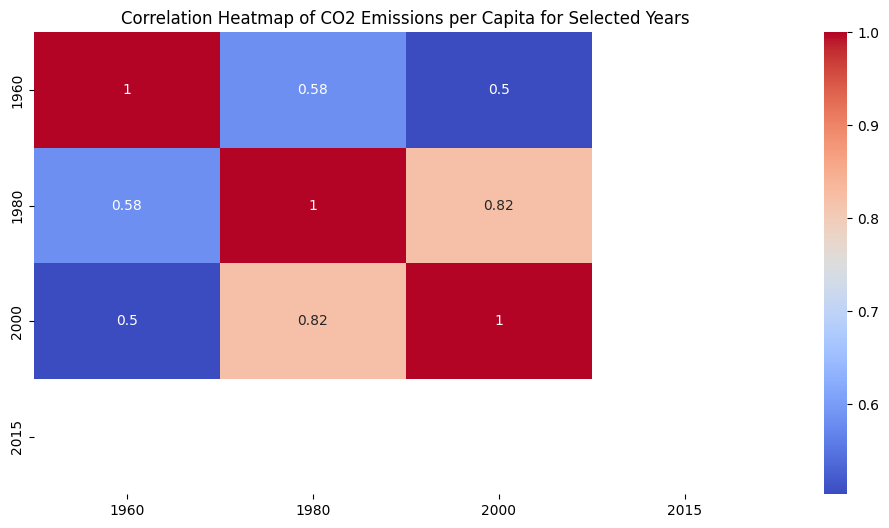

In [32]:
import seaborn as sns

plt.figure(figsize=(12, 6))
correlation_matrix = data[selected_years].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of CO2 Emissions per Capita for Selected Years')
plt.show()


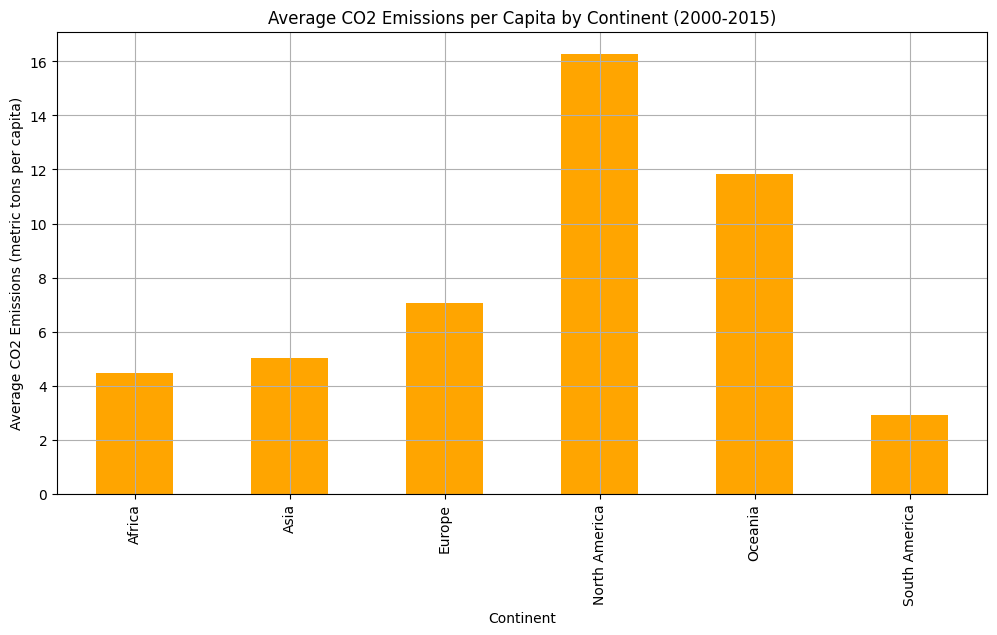

In [33]:
# Assuming there's a mapping of countries to continents (you need to provide this mapping)
continent_mapping = {
    'Germany': 'Europe', 'France': 'Europe', 'United Kingdom': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe',
    'United States': 'North America', 'Canada': 'North America', 'Brazil': 'South America', 'Argentina': 'South America',
    'China': 'Asia', 'India': 'Asia', 'Japan': 'Asia', 'Australia': 'Oceania', 'New Zealand': 'Oceania',
    'South Africa': 'Africa', 'Nigeria': 'Africa', 'Egypt': 'Africa'
}

data['Continent'] = data['Country Name'].map(continent_mapping)
continent_avg_emissions = data.groupby('Continent')['Average Emissions (2000-2015)'].mean().dropna()

plt.figure(figsize=(12, 6))
continent_avg_emissions.plot(kind='bar', color='orange')
plt.title('Average CO2 Emissions per Capita by Continent (2000-2015)')
plt.xlabel('Continent')
plt.ylabel('Average CO2 Emissions (metric tons per capita)')
plt.grid(True)
plt.show()


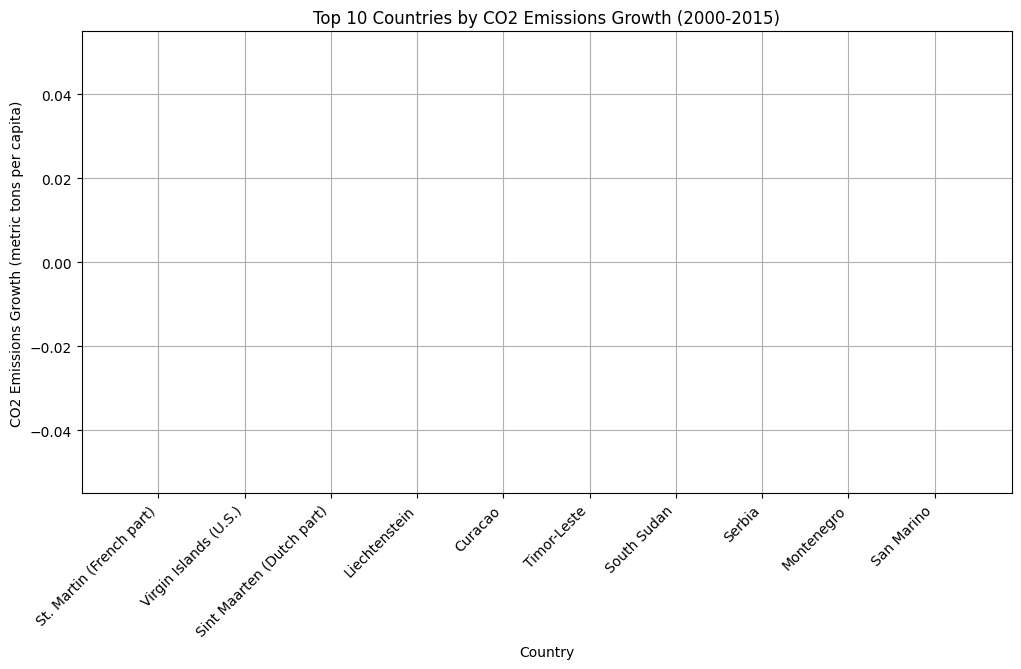

In [34]:
data['Growth (2000-2015)'] = data['2015'] - data['2000']
top_growth_countries = data[['Country Name', 'Growth (2000-2015)']].sort_values(by='Growth (2000-2015)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_growth_countries['Country Name'], top_growth_countries['Growth (2000-2015)'], color='cyan')
plt.title('Top 10 Countries by CO2 Emissions Growth (2000-2015)')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions Growth (metric tons per capita)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


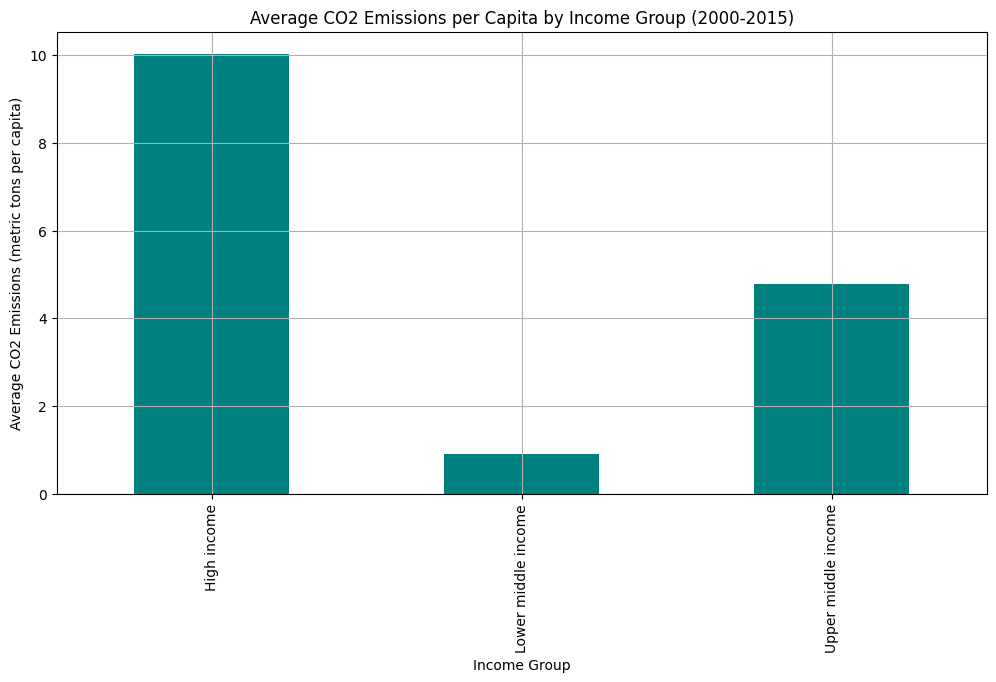

In [35]:
# Assuming there's a mapping of countries to income groups (you need to provide this mapping)
income_group_mapping = {
    'Germany': 'High income', 'France': 'High income', 'United Kingdom': 'High income', 'Italy': 'High income', 'Spain': 'High income',
    'United States': 'High income', 'Canada': 'High income', 'Brazil': 'Upper middle income', 'Argentina': 'Upper middle income',
    'China': 'Upper middle income', 'India': 'Lower middle income', 'Japan': 'High income', 'Australia': 'High income', 'New Zealand': 'High income',
    'South Africa': 'Upper middle income', 'Nigeria': 'Lower middle income', 'Egypt': 'Lower middle income'
}

data['Income Group'] = data['Country Name'].map(income_group_mapping)
income_group_avg_emissions = data.groupby('Income Group')['Average Emissions (2000-2015)'].mean().dropna()

plt.figure(figsize=(12, 6))
income_group_avg_emissions.plot(kind='bar', color='teal')
plt.title('Average CO2 Emissions per Capita by Income Group (2000-2015)')
plt.xlabel('Income Group')
plt.ylabel('Average CO2 Emissions (metric tons per capita)')
plt.grid(True)
plt.show()
